# Experiment Notebook: Network Issuance and Inflation Rate

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis: Inflation Rate and ETH Supply Over Time](#Analysis:-Inflation-Rate-and-ETH-Supply-Over-Time)

# Experiment Summary 

The purpose of this notebook is to explore the ETH issuance and resulting annualized inflation rate across different time horizons and adoption scenarios. 

# Experiment Assumptions

See [assumptions document](ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* (TODO: ADD STEP)
* (TODO: ADD STEP)
* (TODO: ADD STEP)

Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
import copy
import logging
import numpy as np
import pandas as pd
from radcad import Engine

import setup
import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from model.types import Stage
from data.historical_values import df_ether_supply

time: 468 ms (started: 2021-07-04 21:43:12 +02:00)


In [2]:
import experiments.templates.time_domain_analysis as time_domain_analysis

time: 3.25 s (started: 2021-07-04 21:43:13 +02:00)


In [3]:
logger = logging.getLogger()
logger.disabled = False

time: 26.9 ms (started: 2021-07-04 21:43:16 +02:00)


In [4]:
simulation = copy.deepcopy(time_domain_analysis.experiment.simulations[0])

time: 41.9 ms (started: 2021-07-04 21:43:16 +02:00)


In [5]:
from datetime import datetime
from radcad.utils import generate_cartesian_product_parameter_sweep


param_sweep = generate_cartesian_product_parameter_sweep({
    'validator_process': [
        lambda _run, _timestep: 3,  # Normal adoption: current average active validators per epoch from Beaconscan
        lambda _run, _timestep: 3 * 0.5,  # Low adoption: 50% lower scenario
        lambda _run, _timestep: 3 * 1.5,  # High adoption: 50% higher scenario
    ],
    'date_pos': [
        datetime.strptime("2021/12/1", "%Y/%m/%d"),
        datetime.strptime("2022/12/1", "%Y/%m/%d"),
        datetime.strptime("2023/12/1", "%Y/%m/%d"),
        datetime.strptime("2024/12/1", "%Y/%m/%d"),
    ],
#     'eip1559_basefee_process': [
#         lambda _run, _timestep: 0, # Disabled
#         lambda _run, _timestep: 100, # Enabled: Steady state
#         lambda _run, _timestep: 70, # Enabled: MEV
#     ],  # Gwei per gas
#     'eip1559_tip_process': [
#         lambda _run, _timestep: 0, # Disabled
#         lambda _run, _timestep: 1, # Enabled: Steady state
#         lambda _run, _timestep: 30, # Enabled: MEV
#     ],  # Gwei per gas
})

simulation.model.params.update(param_sweep)

time: 28.6 ms (started: 2021-07-04 21:43:16 +02:00)


In [6]:
df, _exceptions = run(simulation)

2021-07-04 21:43:16,556 - root - INFO - Running experiment
2021-07-04 21:43:16,559 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-07-04 21:43:16,862 - root - INFO - Starting simulation 0 / run 0 / subset 1
2021-07-04 21:43:17,242 - root - INFO - Starting simulation 0 / run 0 / subset 2
2021-07-04 21:43:17,523 - root - INFO - Starting simulation 0 / run 0 / subset 3
2021-07-04 21:43:17,804 - root - INFO - Starting simulation 0 / run 0 / subset 4
2021-07-04 21:43:18,081 - root - INFO - Starting simulation 0 / run 0 / subset 5
2021-07-04 21:43:18,357 - root - INFO - Starting simulation 0 / run 0 / subset 6
2021-07-04 21:43:18,638 - root - INFO - Starting simulation 0 / run 0 / subset 7
2021-07-04 21:43:18,923 - root - INFO - Starting simulation 0 / run 0 / subset 8
2021-07-04 21:43:19,200 - root - INFO - Starting simulation 0 / run 0 / subset 9
2021-07-04 21:43:19,478 - root - INFO - Starting simulation 0 / run 0 / subset 10
2021-07-04 21:43:19,760 - root - INFO - Starting 

In [7]:
df_simulated = df.set_index('timestamp', drop=False)

time: 33.7 ms (started: 2021-07-04 21:43:30 +02:00)


# Analysis: Inflation Rate and ETH Supply Over Time

TODO: update description re. scenarios when finalized

This analysis allows the exploration of inflation rate and ETH supply over time, and supports the three adoption scenarios introduced in the second analysis notebook. The activation dates of the two major milestones in this analysis, EIP1559 and Proof of Stake, can be customized to simulate bespoke scenarios.

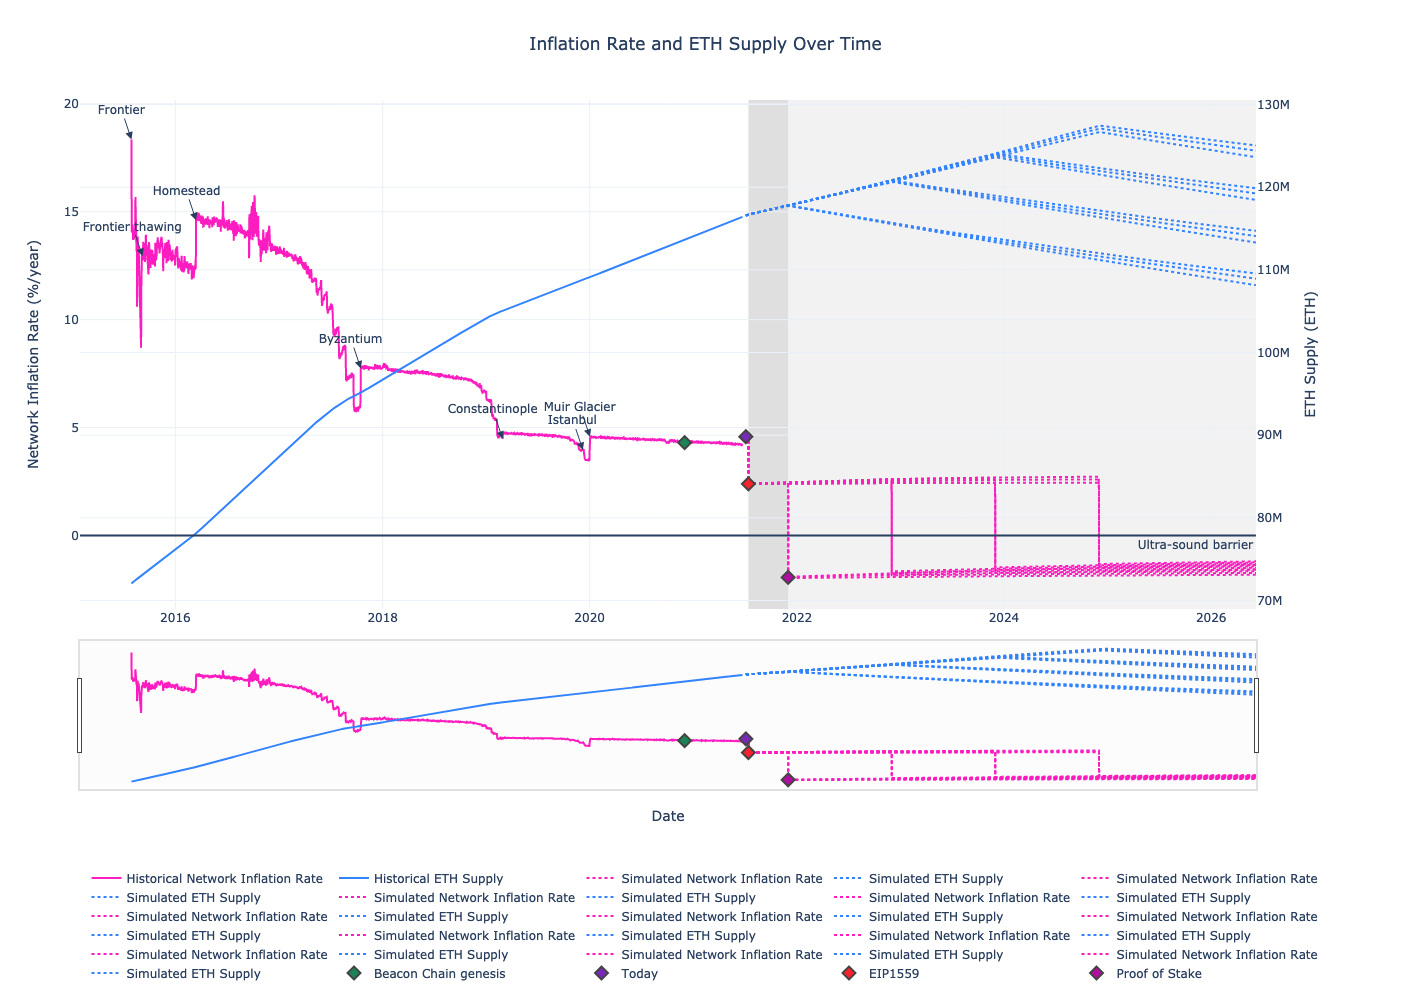

time: 1.88 s (started: 2021-07-04 21:44:27 +02:00)


In [9]:
# TODO: Create a dropdown to choose between the three adoption scenarios
# TODO: Create a dropdown or Slider to allow for the customization of EIP1559 and PoS dates
visualizations.plot_eth_supply_and_inflation_over_all_stages(df_ether_supply, df_simulated)